# Assignment 5: K-NNs and Ensemble Methods

For this assignment, answer directly on this Jupyter notebook. Once you're done, please submit the assignment as "Name_Surname_Assignment5.ipynb"

*Don't forget that commenting your code is very important!*




### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

For this question, we will be using the classic Iris dataset, available in sklearn.

In [39]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator

from sklearn.datasets import load_iris
from sklearn.utils import shuffle

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


######  1) In order to evaluate the performance of our kNN implementation, we first split the dataset into training and test sets. A 70/30 split or something similar should suffice.

In [2]:
### YOUR CODE HERE - Shuffle dataset, then split for balanced classes. 

iris_shuffled = shuffle(iris_df)
iris_shuffled.head(10)
iris_shuffled.reset_index(inplace=True, drop=True)

trainSplit = 0.7
pivot = int(trainSplit * iris_shuffled.shape[0])

iris_train = iris_shuffled[:pivot].copy() # Separating the features from target variables is not essential here
iris_test = iris_shuffled[pivot:].copy()

iris_train = iris_train.values.tolist()
iris_test = iris_test.values.tolist()

In [10]:
### YOUR CODE HERE - Write method that returns Euclidean distance between two points

def getDistance(p1, p2):
    """ Calculates the Euclidean distance between two points. Returns dist float"""
    length = len(p1) - 1
    dist = 0
    
    for i in range(length):
        dist += pow((p1[i] - p2[i]), 2)
        
    return math.sqrt(dist)

###### 2) Now that we've defined a distance metric, we can use it collect the k most similar instances for a new test instance.

In [11]:
### YOUR CODE HERE - Write method calculating the distance for all instances, selecting a subset with the smallest distance values.

def getNeighbours(trainingSet, sample, k):
    """ Calculates k nearest neighbours using a distance metric. Returns neighbours list"""
    distances = []
    length = len(sample) - 1
    for x in range(len(trainingSet)):
        dist = getDistance(sample, trainingSet[x])
        distances.append((trainingSet[x], dist))  # Store distances in list 
    distances.sort(key=operator.itemgetter(1))  # Built in sorting functions in Python
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


###### 3) Let's test our newly written method on the following samples.

In [18]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]

neighbors = getNeighbours(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


###### 4) Now to build a prediction model, write a method that returns a prediction given k nearest neighbours from the previous method.

In [19]:
### YOUR CODE HERE - Write method that takes in k nearest neighbours as input, and votes based on the majority class.

def predict(neighbours):
    """ Returns predicted class response based off majority vote from k neighbours set"""
    
    votes = {}
    for i in range(len(neighbours)):
        current = neighbours[i][-1]
        
        if current in votes:
            votes[current] += 1
        else: 
            votes[current] = 1
    
    # Note that sorted is a function that operates on iterators, so we convert the dictionary votes to a list via the items function
    sortedVotes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedVotes[0][0] # Take the key in the key-value pair, which consists of the majority vote class

In [20]:
# Test your method on the following samples.

neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = predict(neighbors)
print(response)

a


###### 5) One popular classification metric is accuracy, use the following method to check how well our k-NN algorithm performs on the test set we left aside.

In [21]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if (testSet[x][-1] == predictions[x]):
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [22]:
# Test your method on the following samples.

testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


###### 6)  Make predictions on the test set for different values of k. Compare the accuracy for different values and plot test performance, explaining why you think performance increases or decreases for different values of k.

In [36]:
accuracies = {}

for k in range(1, 50, 2):
    predictions = []

    for x in iris_test:
        neighbours = getNeighbours(iris_train, x, k)
        vote = predict(neighbours)
        predictions.append(vote)

    accuracy = getAccuracy(iris_test, predictions)
    
    accuracies[k] = accuracy

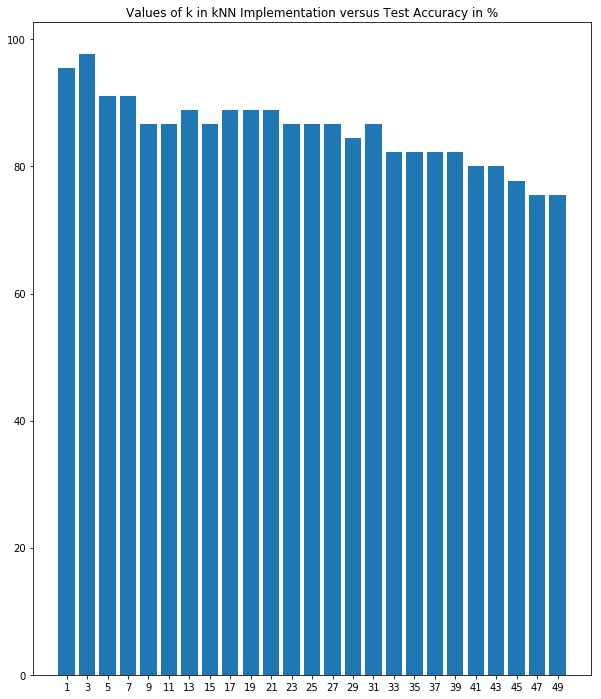

In [47]:
plt.figure(figsize=(10, 12))
plt.title('Values of k in kNN Implementation versus Test Accuracy in %')
plt.bar(range(len(accuracies)), accuracies.values(), align='center')
plt.xticks(range(len(accuracies)), list(accuracies.keys()))

plt.show()

### 5) Algorithm Comparison
- Use the following algorithms to 